In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *

Transfer learning is made easy with transfer learning. using others models.
can modify others netowrks for your own purpose, eliminate the need to start from scratch, use others netowrks to create your own implementations for your own purposes.

This means you can take an existing model thats trainined on far more images that can rocognise many more features than on the small set of images used previously in the binary classifier. these huge models that can recognise and see many more features can be 'locked' weights not changed in backprop, then alter the outer layers to classify/ other tasks you want your model to perform. these can then extract the featurs from your images. 

for example;

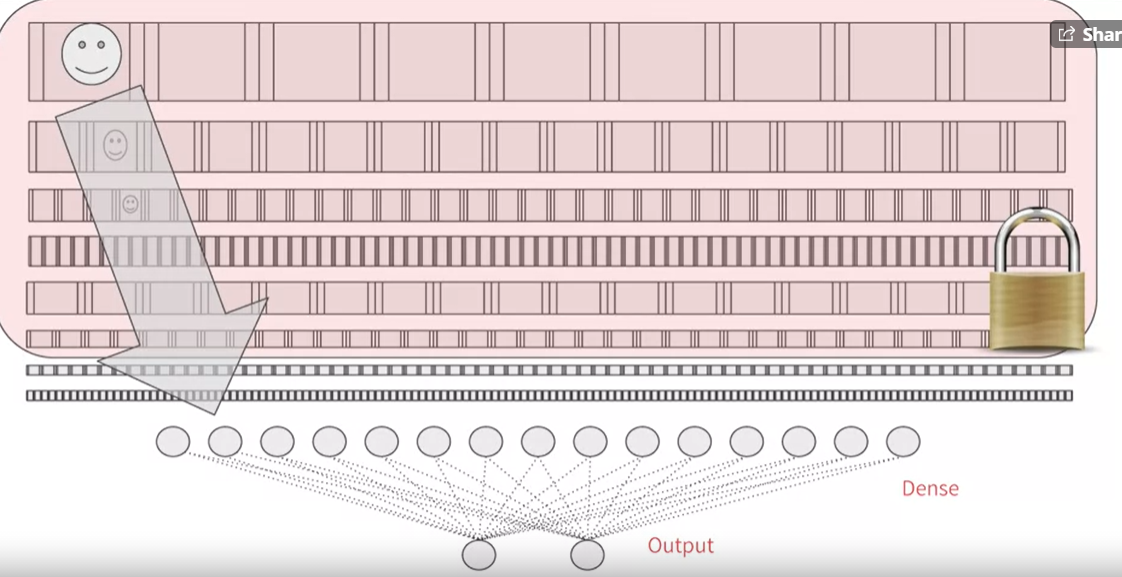

In [3]:
Image.open(r'C:\Users\44788/Desktop\it1.png')

In [2]:
load_weights_file = r'C:\Users\44788\Desktop\OctaveML\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
# this is where the pre trained weights are, however these are not part of the model however, 
# the keras api has the model that can be reached directly...

from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(input_shape = (150,150,3),
                               include_top = False,
                               weights = None)

pre_trained_model.load_weights(load_weights_file)

In [3]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [4]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [13]:
x = Flatten()(last_output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1, activation='sigmoid')(x)

In [14]:
pre_model = Model(pre_trained_model.input, x)
pre_model.compile(optimizer=RMSprop(lr=0.0001),
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest') 

train_dir = r'C:\Users\44788\Desktop\CatsvsDogs\train'
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 23998 images belonging to 2 classes.


In [16]:
validation_datagen = ImageDataGenerator(rescale=1./255) 
validation_dir = r'C:\Users\44788\Desktop\CatsvsDogs\validation'
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 1002 images belonging to 2 classes.


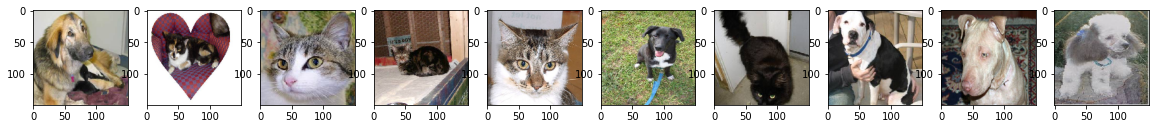

In [37]:
images = train_generator[1]
im = images[1]
fig, ax = plt.subplots(1,10, figsize=(20,20))
for i in range(10):
    im = images[0]
    ax[i].imshow(im[i])

In [17]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.001)

checkpoint_path = r'C:\Users\44788\Desktop\CatsvsDogs\CvD2.h5'
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                            frequency='epoch',
                            save_weights_only=True,
                            save_best_only=True,
                            monitor='val_accuracy',
                            verbose=0)

In [18]:
history = pre_model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=50,
                    epochs=100,
                    validation_steps=50,
                    verbose=0,
                    callbacks=[checkpoint, early_stopping])

<AxesSubplot:>

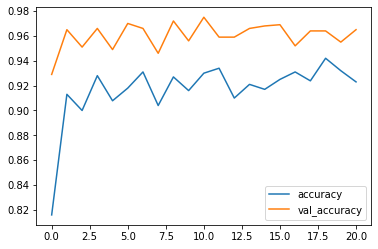

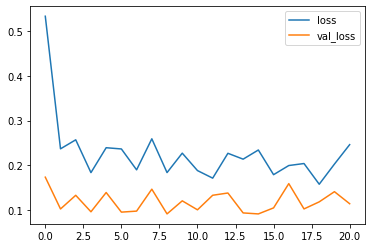

In [19]:
df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])
df.plot(y=['loss', 'val_loss'])